In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import comb
from scipy.stats import pearsonr
from scipy import stats

In [2]:
datasets = ['cont-village', 'cont-hospital', 'cont-workplace-13', 'cont-workplace-15', 
            'email-Enron', 'cont-primary-school', 'bills-senate', 'cont-high-school', 
            'bills-house', 'hosp-DAWN', 'soc-youtube', 'coauth-dblp', 
            'clicks-trivago', 'soc-livejournal', 'soc-orkut', 'soc-flickr']
            
max_simplex_size = 8

In [3]:
results_df = pd.read_csv("../Results/homophily_results.csv")

In [4]:
# Group Lists
contact_datasets = ["cont-hospital", "cont-workplace-13", "cont-workplace-15", 
                "cont-village", "cont-primary-school", "cont-high-school"]

email_datasets = ["email-Enron"]

coauthorship_datasets = ["coauth-dblp"]

political_datasets = ["bills-senate", "bills-house", ]

drug_datasets = ["hosp-DAWN"]

retail_datasets = ["clicks-trivago"]

lsn_datasets = ["soc-youtube", "soc-orkut", "soc-flickr", "soc-livejournal"]

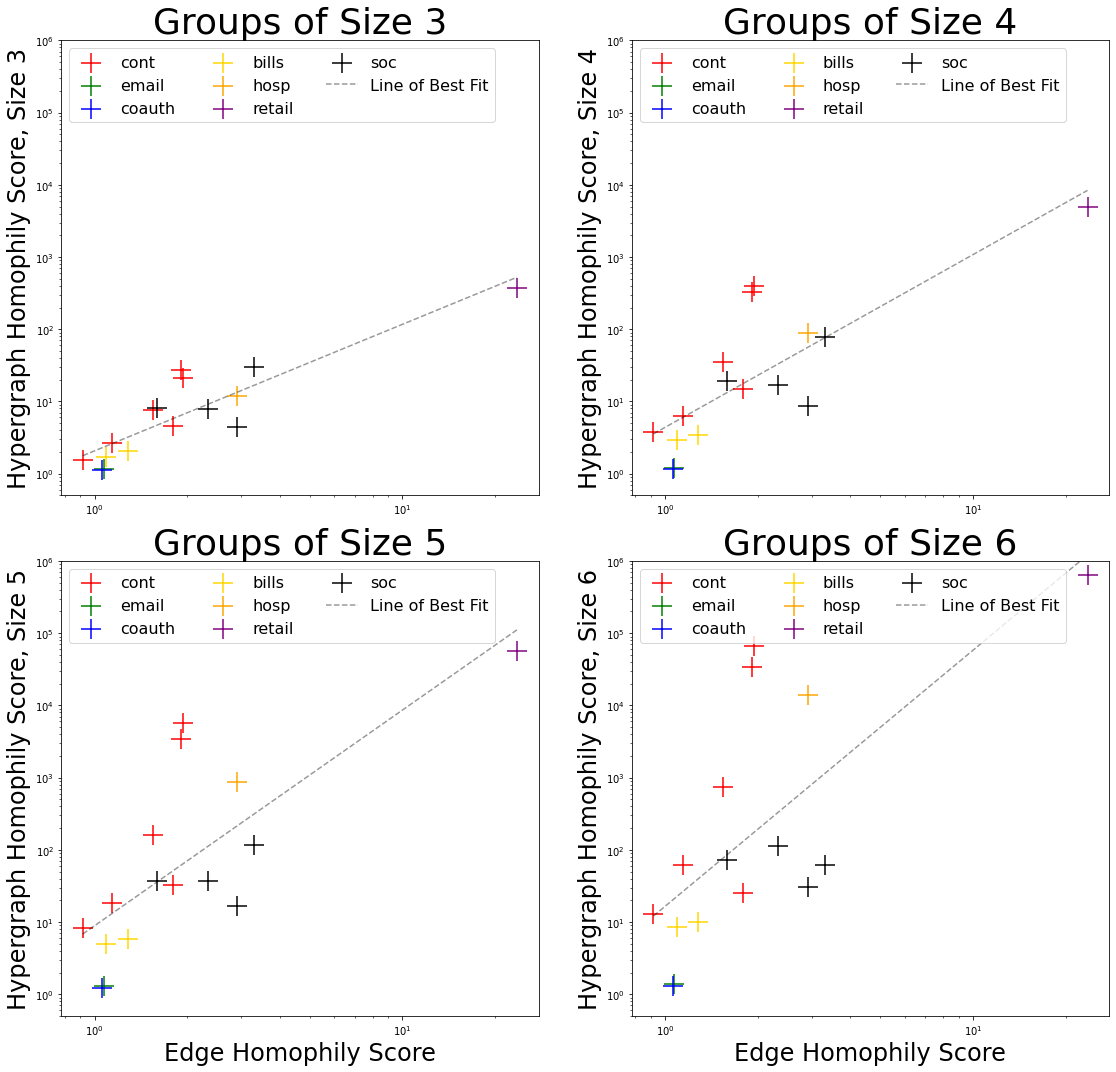

In [5]:
for ind, row in results_df.iterrows():
    if row['dataset'] in contact_datasets:
        results_df.loc[ind, 'Category'] = 'cont'
    elif row['dataset'] in email_datasets:
        results_df.loc[ind, 'Category'] = 'email'
    elif row['dataset'] in coauthorship_datasets:
        results_df.loc[ind, 'Category'] = 'coauth'
    elif row['dataset'] in political_datasets:
        results_df.loc[ind, 'Category'] = 'bills'
    elif row['dataset'] in drug_datasets:
        results_df.loc[ind, 'Category'] = 'hosp'
    elif row['dataset'] in retail_datasets:
        results_df.loc[ind, 'Category'] = "retail"
    elif row['dataset'] in lsn_datasets:
        results_df.loc[ind, 'Category'] = 'soc'
        
# Set color code
colors = {'cont':'red', 'email':'green', 'coauth':'blue', 
          'bills':'gold', 'hosp':'orange', "retail":'purple', 'soc':'black'}

results_df['scattercolor'] = results_df['Category'].map(colors)

# # Plot
fig, axs = plt.subplots(2, 2, figsize=(16,15))

for k in [3, 4, 5, 6]:
    i = int(k / 5)
    j = (k % 2) - 1
    for label, color in colors.items():
        axs[i][j].scatter(
                  results_df[results_df['scattercolor'] == color]['dyadic_score'],
                  results_df[results_df['scattercolor'] == color][f'hypergraph_score_{k}'],  
                  marker='+', c=color, s=400, label=label)

    x = np.log(results_df['dyadic_score'])
    y = np.log(results_df[f'hypergraph_score_{k}'])
    axs[i][j].plot(np.exp(np.unique(x)), np.exp(np.poly1d(np.polyfit(x, y, 1))(np.unique(x))),
           '--', alpha=0.4, c='black', label="Line of Best Fit")


    # log scale axes
    axs[i][j].set_xscale("log")
    axs[i][j].set_yscale("log")
    
    axs[i][j].set_ylim([0.5, 1000000])

    # Label Axes
    axs[i][j].set_ylabel(f'Hypergraph Homophily Score, Size {k}', fontsize=24)
    
    if(i > 0):
        axs[i][j].set_xlabel('Edge Homophily Score', fontsize=24)

    ## make legend
    axs[i][j].legend(loc='upper left', ncol=3, fontsize=16)
    axs[i][j].set_title(f"Groups of Size {k}", fontsize=36)

#plt.suptitle("Hypergraph Homophily vs Dyadic Homophily")
plt.tight_layout()
# plt.savefig('hypergraph_empirical.eps', dpi=300, format='eps')

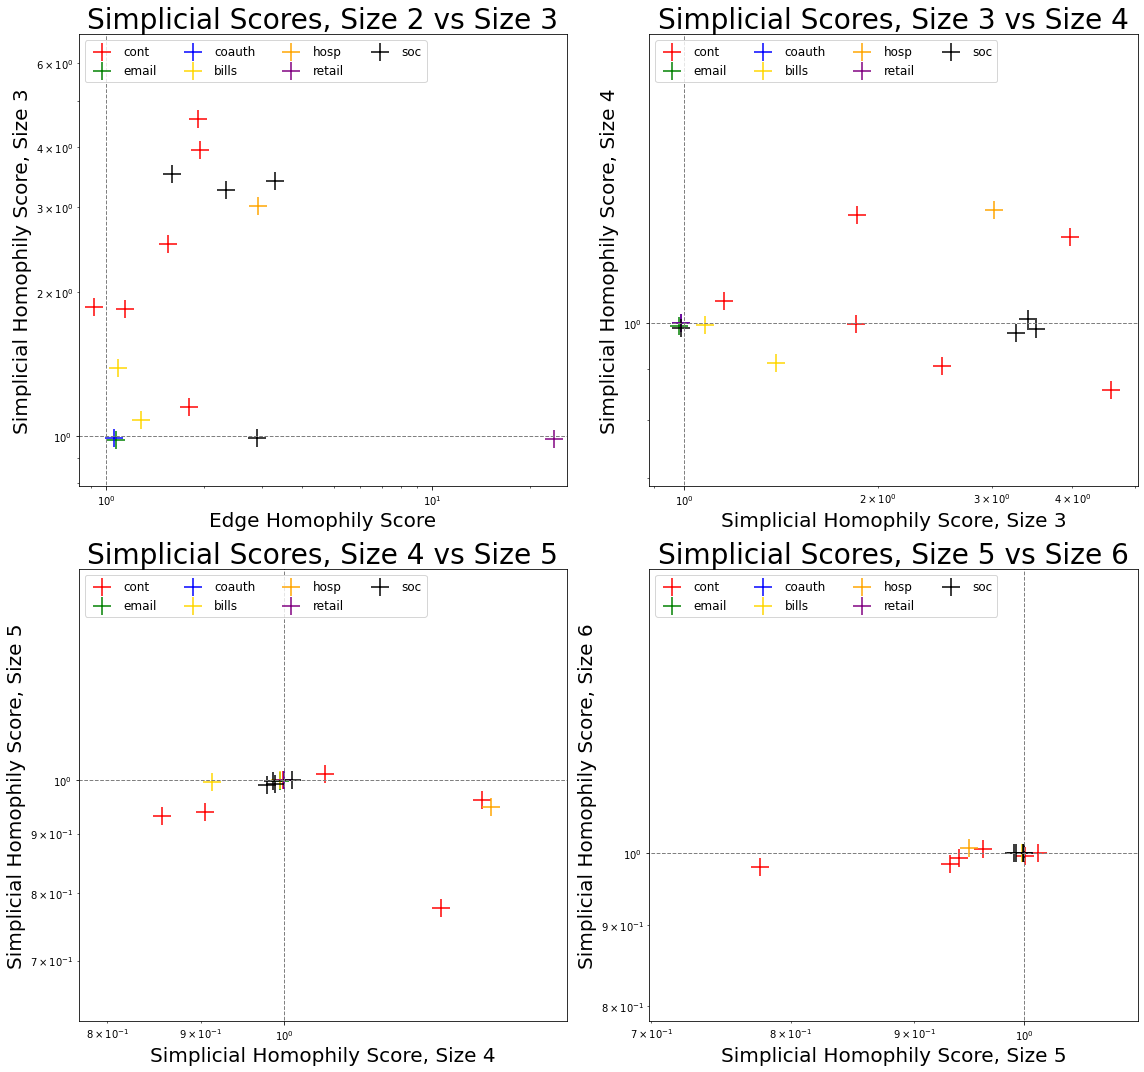

In [6]:
# # Plot
fig, axs = plt.subplots(2, 2, figsize=(16,15))

for k in [3, 4, 5, 6]:
    i = int(k / 5)
    j = (k % 2) - 1
    xcol = f'dyadic_score' if k == 3 else f'simplicial_score_{k-1}'
    for label, color in colors.items():
        axs[i][j].scatter(
                  results_df[results_df['scattercolor'] == color][xcol],
                  results_df[results_df['scattercolor'] == color][f'simplicial_score_{k}'],  
                  marker='+', c=color, s=300, label=label)

    y = np.log(results_df[f'simplicial_score_{k}'])
    x = np.log(results_df[xcol])


    # log scale axes
    axs[i][j].set_xscale("log")
    axs[i][j].set_yscale("log")
   
    axs[i][j].hlines(1, 0, 10000, color='grey', linestyle='dashed', linewidth=1)
    axs[i][j].vlines(1, 0, 10000, color='grey', linestyle='dashed', linewidth=1)
    
    axs[i][j].set_ylim(min(np.exp(y))*0.8, max(np.exp(y))*1.5)
    axs[i][j].set_xlim(min(np.exp(x))*0.9, max(np.exp(x))*1.1)
    
    # Label Axes
    axs[i][j].set_ylabel(f'Simplicial Homophily Score, Size {k}', fontsize=20)
    if(k == 3):
        axs[i][j].set_xlabel('Edge Homophily Score', fontsize=20)
    else:
        axs[i][j].set_xlabel(f'Simplicial Homophily Score, Size {k-1}', fontsize=20)
    ## make legend
    axs[i][j].legend(loc='upper left', ncol=4, fontsize=12)
    axs[i][j].set_title(f"Simplicial Scores, Size {k-1} vs Size {k}", fontsize=28)

#plt.suptitle("Hypergraph Homophily vs Dyadic Homophily")
plt.tight_layout()
# plt.savefig('simplicial_empirical.eps', dpi=300, format='eps')